In [10]:
from oxidation import *
import glob
import CZDS_utils

pasta = "Arqv/xdi_Ferros/Fe_oxidos" # Define a pasta que será utilizada para encontrar os .xdis
arquivos = glob.glob(f"{pasta}/*.xdi") #Utiliza o glob para pegar os arquivos


elementos_permitidos = "Fe"
# é possivel rodar para vários: elementos_permitidos = ['Ti', 'V', 'Cr', 'Mn', Fe, 'Co', 'Ni', 'Cu']
borda = "K"


# Loop para processar cada arquivo .xdi
for filepath in arquivos:
    with open(filepath, 'r') as file: # Abre o arquivo para rodar o find_element_edge
        symbol, edge = find_element_edge(file)
        if (symbol == elementos_permitidos) and (edge == borda):
            
            e, mu = norm_e_mu(filepath) # Retira os valores de energia e mu de cada xdi
            
            integ = integrate_energy_mu(e, mu, 7112.0) # Realiza a integração, o terceiro input da função é específico para cada elemento
            del_E = delta_energy(integ[0], integ[1])
            print(f'{filepath} \n  ΔE = {del_E} eV')

        
        else:
            #não rodar nada no momento se não for elemento 3D ou borda K
            pass

Arqv/xdi_Ferros/Fe_oxidos\Fe2O3_rt_01.xdi 
  ΔE = 20.714076296912307 eV
Arqv/xdi_Ferros/Fe_oxidos\Fe3O4_rt_01.xdi 
  ΔE = 19.782779875818967 eV
Arqv/xdi_Ferros/Fe_oxidos\FeO_rt_01.xdi 
  ΔE = 17.557237847998575 eV


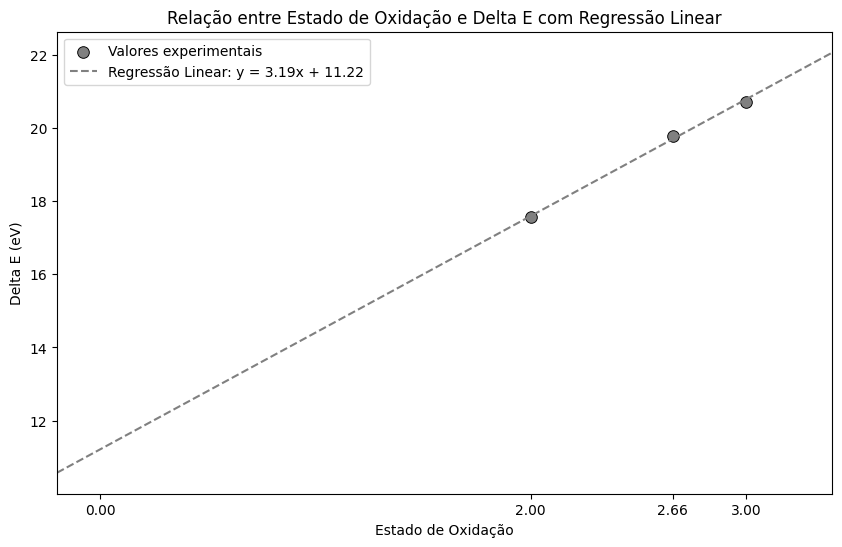

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Dicionário de estados de oxidação e valores de Delta E
Fe_oxidation_states_deltaE = {
    "+2": [17.557237847998575],
    "+2.66": [19.782779875818967],
    "+3": [20.714076296912307]
}

# Converter o dicionário em um DataFrame e mapear 
oxidation_map = {"0": 0, "+2": 2, "+2.66": 2.66, "+3": 3}
data = pd.DataFrame([ 
    {"Oxidation State": oxidation_map[state], "Delta E": deltaE} 
    for state, deltaEs in Fe_oxidation_states_deltaE.items() 
    for deltaE in deltaEs 
])

# Separar variáveis independentes e dependentes
X = data["Oxidation State"].values.reshape(-1, 1)
y = data["Delta E"].values

# Criar e ajustar o modelo de regressão linear
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Coeficientes da reta
slope = model.coef_[0]
intercept = model.intercept_

# Fazer previsões para a linha de regressão
X_fit = np.linspace(-0.2, 3.4, 100).reshape(-1, 1)  # Valores para prever, abrangendo a faixa de dados
y_fit = model.predict(X_fit)

# Configuração do gráfico usando seaborn para pontos de dados e matplotlib para a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Oxidation State", y="Delta E", color="gray", marker="o", s=70, edgecolor="black", label="Valores experimentais")

# Plotar a linha de regressão calculada
plt.plot(X_fit, y_fit, color="gray", linestyle="--", label=f"Regressão Linear: y = {slope:.2f}x + {intercept:.2f}")

# Ajustes nos limites e marcações para melhor visualização
plt.xlim(-0.2, 3.4)
plt.xticks([0, 2, 2.66, 3])

# Adicionar títulos e rótulos
plt.title("Relação entre Estado de Oxidação e Delta E com Regressão Linear")
plt.xlabel("Estado de Oxidação")
plt.ylabel("Delta E (eV)")
plt.legend()

plt.show()
